#### CSCE 320 :: Principles of Data Science ::Texas A&M University :: Fall 2020


# Homework 1: I Want to Believe!

### 100 points [5% of your final grade]
### Due: Sunday, September 6 by 11:59pm

*Goals of this homework:* The objective of this homework is to collect data from the web, clean it, and then make some observations based on exploratory data analysis.

*Submission instructions (Canvas):* To submit your homework, rename this notebook as `UIN_hw1.ipynb`. For example, if your UIN is `123456789`, then your homework submission would be something like `123456789_hw1.ipynb`. Submit this notebook via Canvas (looking for homework 1 under the assignment section. Your notebook should be completely self-contained, with the results visible in the notebook. We should not have to run any code from the command line, nor should we have to run your code within the notebook (though we reserve the right to do so). So please run all the cells for us, and then submit. 

*Late submission policy:* For this homework, you may use up to three of your late days, meaning that no submissions will be accepted after Wednesday, September 9 at 11:59pm.

### Collaboration declarations:

You should add in all of your collaboration declarations here. 

* https://www.pluralsight.com/guides/extracting-data-html-beautifulsoup
* https://www.kite.com/python/examples/4420/beautifulsoup-parse-an-html-table-and-write-to-a-csv
* https://datatofish.com/import-csv-file-python-using-pandas/
* https://www.geeksforgeeks.org/python-string-isnumeric-application/#:~:text=In%20Python%2C%20isnumeric()%20is,%2C%20It%20returns%20%E2%80%9CFalse%E2%80%9D.
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html
* https://www.geeksforgeeks.org/python-string-find/
* https://garden.vsupalov.com/writing/old/get-rid-of-the-automatic-pandas-generated-boxplot-title/
* https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
* Piazza as reference

*Recall our homework collaboration policy: Your homework is yours alone and you are expected to complete each homework independently. Your solution should be written by you without the direct aid or help of anyone else. However, we believe that collaboration and team work are important for facilitating learning, so we encourage you to discuss problems and general problem approaches (but not actual solutions) with your classmates. If you do have a chat with another student about a homework problem, you must inform us by writing a note on your homework submission (e.g., Bob pointed me to the relevant section for problem 3). The basic rule is that no student should explicitly share a solution with another student (and thereby circumvent the basic learning process), but it is okay to share general approaches, directions, and so on. If you feel like you have an issue that needs clarification, feel free to contact either me or the TA.*

## (25 points) Part 1: UFOs are Out There, But First I Need to Store them Locally

For this first part, we're going to collect evidence of UFO sightings from the **National UFO Reporting Center**. Specifically, we're going to focus only on UFO sightings in Alaska, as reported at this webpage:

* http://www.nuforc.org/webreports/ndxlAK.html

Recall that you can view the source of a webpage in Chrome under View &rarr; Developer &rarr; View Source. You'll notice, however, that this raw HTML is not in our friendly csv format and so will require some initial pre-processing. In particular, we're going to use the Python libraries **[requests](https://requests.readthedocs.io/en/master/)** and **[beautiful soup](https://www.crummy.com/software/BeautifulSoup/)** to convert this UFO data from its original HTML format into csv. 

Hints:
* You'll notice that the column headers are in the `<TH>` tags.
* The values are in the `<TD>` tags.
* In beautiful soup, something like `.find_all('td')` may help you.
* To write the csv, you might want to `import csv` and take a look at the functions provided.
* If you google for "beautifulsoup table to csv" you should find some nice starting points.  Note, however, that you may not use an existing method that auto-magically converts the HTML into csv; we expect you to write your own code. If you borrow some elements from online resources, you should cite them in the comments. 

In [22]:
# your code here
import urllib
import requests
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup


#Step 1: standard request --------------------------------------------------
url = 'http://www.nuforc.org/webreports/ndxlAK.html'
req = requests.get(url)
soup = BeautifulSoup(req.text)

#Step 2: finding column names ----------------------------------------------
thead = soup.find("thead") # column name resides in <thead> </thead>
# print(thead)
column_names = []
for th in thead.find_all("th"):
    column_names.append(th.text.replace('\n', ' ').strip())
column_len = len(column_names)
# to test
# print(column_names)
# print(column_len)

#Step 3: finding all data --------------------------------------------------
tbody = soup.find("tbody")
data = []
row = []
for td in tbody.find_all("td"):
    row.append(td.text.replace('\n', ' ').strip())
    if len(row) >= 7: # no more columns, move to next row
        data.append(row)
        row = [] #reset the row
# print(data)

#Step 4: writing to csv
filename = 'ufo_alaska.csv'
with open(filename, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile, delimiter=',')
    writer.writerow(column_names)
    writer.writerows(data)

# you should use requests to get the webpage, then extract 
# the appropriate column headings and rows
# then write this out to csv to a local file called 'ufo_alaska.csv'

In [23]:
# your code here
# from https://datatofish.com/import-csv-file-python-using-pandas/
# note: developed on a Windows machine
data_CSV = pd.read_csv('ufo_alaska.csv', encoding='latin1')
data_CSV.head()



,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,1 minute,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,10-12 minutes,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,8/20/20 04:00,Anchorage,AK,Triangle,45 minonds,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,3-4 minutes,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,8 minutes,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20


Once you have your local csv file, you should read it in and then issue the .head() command.

## (45 points) Part 2: UFOs are a Mess! Time to Clean Up!

Okay, now we move to the fun part -- making sense of this messy data. These UFO reports are user-generated with little input validation. As a result, you will notice lots of oddities. 

Let's begin by focusing on the **Duration** column. As a first pass, let's make a grossly simplifying assumption -- that the only valid data is any duration that is of the form:  

* 1 second
* 2 seconds
* ...
* 1 minute
* 2 minutes
* ...
* 1 hour
* 2 hours 
* ...
* 1 day
* 2 days 
* ...

That is, we will only accept positive integers followed by a space, followed by a properly spelled unit. Every other entry is invalid. For example, that means these are all invalid durations:

* 1s
* 2 min.
* 2-3 seconds
* 10-15min
* 1 minute+
* 30 minutes and longer
* about 1.5 minutes

Create a new pandas dataframe that only includes sightings with these values, **where you convert all durations into seconds**. How many total rows are there in the original dataset? How many rows in your new 'validated' dataset? Then plot a boxplot of the duration (in seconds).

In [24]:
# your code here 
# filter our invalid durations
# convert all valid durations to seconds
dataframe_duration = pd.read_csv('ufo_alaska.csv',encoding='latin1')

duration_str = ""
duration_array = []

for row in dataframe_duration.index: # looping thru all the durations
    duration_str = str(dataframe_duration.loc[row, "Duration"]) # convert all durations to string
    # print(type(duration_str))
    # duration_array.append(duration_str) 
    duration_str_list = duration_str.split() # spliting the duration into array of strings
    # checking if the first string is a number.
    if (duration_str_list[0].isnumeric() and len(duration_str_list) == 2):
        if (duration_str_list[1]=='second' or duration_str_list[1]=='seconds'): #checking to see if second string is second(s)
            duration = int(duration_str_list[0], base=10)
            # print(duration_str, duration)
            dataframe_duration.loc[row, 'Duration'] = duration
        elif (duration_str_list[1]=='minute' or duration_str_list[1]=='minutes'): #checking to see if second string is minute(s)
            duration = int(duration_str_list[0], base=10) * 60
            dataframe_duration.loc[row, 'Duration'] = duration
        elif (duration_str_list[1]=='hour' or duration_str_list[1]=='hours'): #checking to see if second string is hours(s)
            duration = int(duration_str_list[0], base=10) * 60 * 60
            dataframe_duration.loc[row, 'Duration'] = duration 
        elif (duration_str_list[1]=='day' or duration_str_list[1]=='days'): #checking to see if second string is days(s)
            duration = int(duration_str_list[0], base=10) * 60 * 60 * 24
            dataframe_duration.loc[row, 'Duration'] = duration
        else:
            dataframe_duration.drop(row, inplace=True) # delete row
    else:
        dataframe_duration.drop(row, inplace=True) # # delete row
dataframe_duration = dataframe_duration.astype({"Duration": float})
dataframe_duration = dataframe_duration.reset_index(drop=True)
dataframe_duration

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,60.0,One craft seen much lower and moving slower th...,8/27/20
1,4/9/20 10:15,54.690 163.771,AK,Changing,480.0,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
2,3/30/20 01:18,Point Makenzie,AK,Light,1800.0,"I don't know if I'm correct but, I just stare ...",6/25/20
3,3/23/20 12:00,Juneau,AK,Changing,1800.0,Yellow light craft That changes shapes over Ju...,5/21/20
4,3/12/20 20:57,Eagle River,AK,Circle,240.0,Two bright flying objects flying above Eagle R...,6/25/20
...,...,...,...,...,...,...,...
259,11/1/69 19:30,Fairbanks,AK,Formation,240.0,Sighting of 5 objects in a PENTAGON formation ...,7/19/10
260,6/30/68 23:00,Anchorage,AK,Circle,60.0,Looked out of window before going to bed. Saw ...,9/11/15
261,9/15/67 00:00,Cook Inlet (at sea),AK,Light,600.0,I am 80 years old and want to tell what went o...,12/21/15
262,7/1/49 11:00,Fairbanks,AK,Disk,120.0,"Enormous metallic disc in Alaska sky, 1949.",12/23/13


In [25]:
# your code here
# total rows in original dataset
print("The total rows in the original dataset:", len(data_CSV.index) )

# valid rows in your new 'validated' dataset
print("The total rows in the validated dataset:", len(dataframe_duration.index) )

The total rows in the original dataset: 439
The total rows in the validated dataset: 264


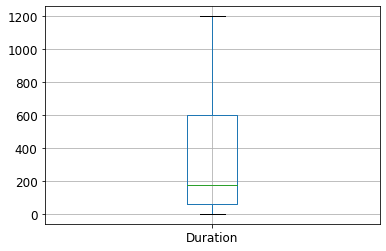

<Figure size 864x720 with 0 Axes>

In [37]:
# your code here
# boxplot code here
# ignoring outliers to compare to the later boxplot
boxplot = dataframe_duration.boxplot(column=['Duration'], showfliers = False)
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 12})

Interesting. But we threw away a **lot** of data. We can do better. For this part, you will do your best to clean up the durations from your original dataset. Keep in mind some initial guidelines:

* If a duration has a range, use the average as its value. For example, if the duration is listed as “6-8 minutes”, you should consider the duration as “7 minutes”. (Again, you will need to eventually convert minutes into seconds).
* If a duration has a “<” sign, you should simply ignore the “<” sign. For example if the duration is specified as “< 1 minute”, consider the duration to be “1 minute”. You should subsequently convert “1 minute” to "60 seconds".
* If a duration has a “>” sign, you should simply ignore the “>” sign. 
* You should ignore any row with an empty duration.

You will probably have to improvise as you go along, so make detailed notes of what decisions you are making and why.

In [27]:
# based on the previous code
# definition from https://elearning.wsldp.com/python3/python-check-string-is-a-number/#:~:text=Check%20if%20a%20string%20is%20a%20Float%20in%20Python%203,floating%20point%20number%20or%20not.&text=isnumeric()%20function%20to%20check,is%20a%20numeric%20or%20not.
# check if string is a number (float or int)
def is_number(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

cleaned_dataframe_duration = pd.read_csv('ufo_alaska.csv',encoding='latin1')
cleaned_duration_str = ""
cleaned_duration_arr = []

print("Durations dropped:")
for row in cleaned_dataframe_duration.index: # looping thru all the durations
    cleaned_duration_str = str(cleaned_dataframe_duration.loc[row, "Duration"]) # convert all durations to string
    cleaned_duration_str_list = cleaned_duration_str.split() # spliting the duration into array of strings
    
    # Cleaning + by checking last character of first string (5+ minutes will be 5 minutes)
    if (cleaned_duration_str_list[0][-1] == '+'): #delete last character
        cleaned_duration_str_list[0] = cleaned_duration_str_list[0][:-1]
    # Cleaning <, >, @, and ~ by checking first string and deleting the first string conditionally
    if (cleaned_duration_str_list[0] == '<' or cleaned_duration_str_list[0] == '>' or cleaned_duration_str_list[0] == '~' or cleaned_duration_str_list[0] == '@'):
        cleaned_duration_str_list.pop(0)
    # Cleaning <, >, @, and ~ by checking first character of first string
    if (cleaned_duration_str_list[0][0] == '<' or cleaned_duration_str_list[0][0] == '>' or cleaned_duration_str_list[0][0] == '~' or cleaned_duration_str_list[0][0] == '@'):
        cleaned_duration_str_list[0] = cleaned_duration_str_list[0][1:] #delete first character (<1 minute become -> 1 minute)
    # Finding instance with - in the middle of the first string (ex. 1-2) and replacing it with the middle
    hyphon = cleaned_duration_str_list[0].find('-')
    if (hyphon != -1):
        num1 = (cleaned_duration_str_list[0][0:hyphon].strip())
        num2 = (cleaned_duration_str_list[0][hyphon+1:].strip())
        if(is_number(num1) and is_number(num2)):
            num1 = float(num1)
            num2 = float(num2)
            avg_num = (num1 + num2)/2
            cleaned_duration_str_list[0] = avg_num
            # print(cleaned_duration_str_list[0], num1, num2, avg_num)    
    # Changed cases, the second string as to be close to the time interval, not exact
    # Another case, is checking if the first string is a number, rather than an integer, and converting the type to float
    if (is_number(cleaned_duration_str_list[0]) and len(cleaned_duration_str_list) >= 2): # checking if the first string is a number.
        if (cleaned_duration_str_list[1][0:3].lower()=='sec'): #checking to see if second string is second(s)
            duration = float(cleaned_duration_str_list[0])
            # print(cleaned_duration_str, duration)
            cleaned_dataframe_duration.loc[row, 'Duration'] = duration
        elif (cleaned_duration_str_list[1][0:3].lower()=='min'): #checking to see if second string is minute(s)
            duration = float(cleaned_duration_str_list[0]) * 60
            cleaned_dataframe_duration.loc[row, 'Duration'] = duration
        elif (cleaned_duration_str_list[1][0:4].lower()=='hour' or cleaned_duration_str_list[1][0:2].lower()=='hr'): #checking to see if second string is hours(s)
            duration = float(cleaned_duration_str_list[0]) * 60 * 60
            cleaned_dataframe_duration.loc[row, 'Duration'] = duration 
        elif (cleaned_duration_str_list[1].lower()=='day' or cleaned_duration_str_list[1].lower()=='days'): #checking to see if second string is days(s)
            duration = float(cleaned_duration_str_list[0]) * 60 * 60 * 24
            cleaned_dataframe_duration.loc[row, 'Duration'] = duration
        else: #edge case
            print(cleaned_dataframe_duration.loc[row, 'Duration'])
            cleaned_dataframe_duration.drop(row, inplace=True) # delete row
    else: #otherwise
        print(cleaned_dataframe_duration.loc[row, 'Duration'])
        cleaned_dataframe_duration.drop(row, inplace=True) # delete row
cleaned_dataframe_duration = cleaned_dataframe_duration.astype({"Duration": float})
cleaned_dataframe_duration = cleaned_dataframe_duration.reset_index(drop=True)
cleaned_dataframe_duration




Durations dropped:
Several hours
Unknown
5
Ski
nan
Continuous
?
Flash
10
21:30
Few minutes
17:00
35 40 minutes
nan
4:45
01:30
nan
Since i saw it the 10th
nan
30seconds
Unknown
a few seconds
nan
All night
Seconds
Minutes
nan
15
3
a few seconds
still on
instant
10
nan
all night
20 or 30 minutes
nan
about 1.5 minutes
01100
30mins
a few seconds
about 10 min
Dabarr
15min
unknown
nan
one minute
10-15min
a little more than a week
seconds
almost ten whole minutes
nan
on tv
unknown
seconds
Approx. 3hrs
nan
10,000
5
1:00
a couple seconds
3 1/2 to 4 minutes
approx 1 hour
nan
approx. 6 hrs
one day


,Date / Time,City,State,Shape,Duration,Summary,Posted
0,8/22/20 01:00,Anchorage Ak,AK,Circle,60.0,One craft seen much lower and moving slower th...,8/27/20
1,8/21/20 10:15,Anchorage,AK,Disk,660.0,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,8/20/20 04:00,Anchorage,AK,Triangle,2700.0,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,8/17/20 00:30,Bethel,AK,Triangle,210.0,Black Triangle UFO in Alaska,8/20/20
4,4/9/20 10:15,54.690 163.771,AK,Changing,480.0,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
...,...,...,...,...,...,...,...
368,10/1/57 16:00,Nelchina (near),AK,Unknown,180.0,This incident occurred about October of 1956 o...,12/7/06
369,2/1/54 02:00,Fairbanks,AK,Unknown,1140.0,RADAR INTERCEPT OF UFO BY USAF PILOT IN ALASKA...,1/10/09
370,7/1/49 11:00,Fairbanks,AK,Disk,120.0,"Enormous metallic disc in Alaska sky, 1949.",12/23/13
371,4/30/43 23:00,Bering Sea,AK,Other,3600.0,1943 sighting of four linearly arranged red li...,3/19/09


In [28]:
# your code here
# total rows in original dataset

print("The total rows in the original dataset:", len(data_CSV.index) )

# valid rows in your cleaned dataset
print("The total rows in the validated dataset:", len(cleaned_dataframe_duration.index) )

The total rows in the original dataset: 439
The total rows in the validated dataset: 373


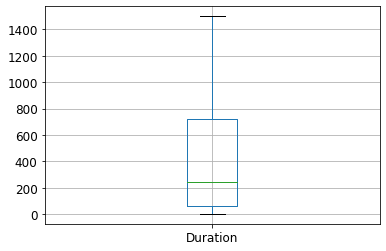

<Figure size 864x720 with 0 Axes>

In [36]:
# your code here
# draw a boxplot for your cleaned dataset
# ignoring outliers for comparison
boxplot_clean = cleaned_dataframe_duration.boxplot(column=['Duration'], showfliers = False)
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 12})

Now, revisit your two boxplots -- for the initial "valid" dataset and then for your cleaned dataset. What do you observe? What differences does cleaning have? Would you imagine your downstream analyses would be affected by this cleaning step? Explain.

If we ignore the outliers for both boxplots, then the "valid" dataset and the cleaned dataset are similar. The key differences are that the cleaned dataset is pulled higher, meaning that the median and third quartile is higher in the cleaned dataset compared to the "valid" one.

The clean dataset would affect downstream because IQR is larger than the valid one, the middle 50 percent is higher. Particularly, the spread from Median to Q3 is larger. This increase of spread will increase the range of the "bulk" of the values. With the slightly higher median, it probably will not affect analyses because the change of median is small. 


To clean this data, the code from earlier was revised. This means a subset of the clean dataset is the valid dataset. Additionally, I loosened the rule where the spelling of the time. Instead of "minute/s" the first 3 characters has to be "min". Similarly, "second/s" -> "sec". "Hr/s" will be accepted has hours. Floats will be allowed, rather than just ints. The cleaned dataset ignored +, <, >, @, and ~. If there is something like 1-2, the average between the two will be accounted for. Everything else will be ignored.

The limitations to this dataset is that it is parsed by spaces, thus durations such as 15min will not be accounted for. Also the dataset did not convert number represented by words, meaning ten minutes will not be accounted for. Last, I did not ignore stuff such as "approx" or "about". All these are possible to account for, but would be tedious.

## (30 points) Part 3: Aliens, aliens everywhere.
Finally, let's begin our initial analysis of the cleaned UFO dataset. In this section, we're going to do some plotting with matplotlib and draw some initial conclusions that may guide our future study of this UFO dataset. 

Which **shapes** are most observed?

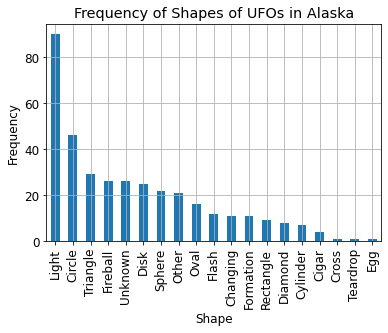

<Figure size 864x720 with 0 Axes>

In [35]:
# your code here
# create a plot of shapes (your choice of what you consider the appropriate plot)
# use a frequency plot
frq_plot_shape = cleaned_dataframe_duration['Shape'].value_counts().plot(kind = 'bar', x = "Shape", y = "Frequency", grid = True)
frq_plot_shape.set_xlabel("Shape")
frq_plot_shape.set_ylabel("Frequency")
frq_plot_shape.set_title("Frequency of Shapes of UFOs in Alaska")
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 12})

Do different UFO shapes have different durations?

<class 'matplotlib.axes._subplots.AxesSubplot'>


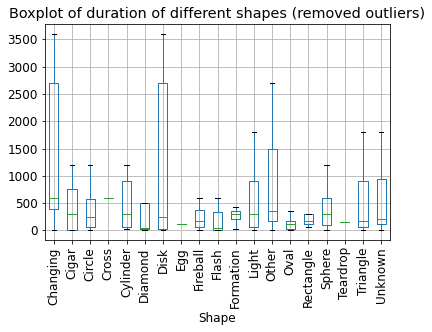

<Figure size 864x720 with 0 Axes>

In [39]:
# your code here
# create a plot of shapes/durations
#ignore outliers
boxplot_shape = cleaned_dataframe_duration.boxplot(rot = 90, by = 'Shape', column=['Duration'], showfliers = False)
print(type(boxplot_shape))
# used to get title https://garden.vsupalov.com/writing/old/get-rid-of-the-automatic-pandas-generated-boxplot-title/
plt.title("Boxplot of duration of different shapes (removed outliers)")
plt.suptitle("")
plt.figure(figsize=(12,10))
plt.rcParams.update({'font.size': 12})

Are there more UFO sightings in recent years than in the past?

,Date / Time,City,State,Shape,Duration,Summary,Posted
0,2020,Anchorage Ak,AK,Circle,60.0,One craft seen much lower and moving slower th...,8/27/20
1,2020,Anchorage,AK,Disk,660.0,Elmendorf Airbase launched 3 F-22 jets with af...,8/27/20
2,2020,Anchorage,AK,Triangle,2700.0,"Spinning pyramid with red, green, blue lights,...",8/27/20
3,2020,Bethel,AK,Triangle,210.0,Black Triangle UFO in Alaska,8/20/20
4,2020,54.690 163.771,AK,Changing,480.0,REPORT FROM ((name deleted)) 5-29-20 DATE O...,6/25/20
...,...,...,...,...,...,...,...
367,1967,Cook Inlet (at sea),AK,Light,600.0,I am 80 years old and want to tell what went o...,12/21/15
368,1957,Nelchina (near),AK,Unknown,180.0,This incident occurred about October of 1956 o...,12/7/06
369,1954,Fairbanks,AK,Unknown,1140.0,RADAR INTERCEPT OF UFO BY USAF PILOT IN ALASKA...,1/10/09
370,1949,Fairbanks,AK,Disk,120.0,"Enormous metallic disc in Alaska sky, 1949.",12/23/13


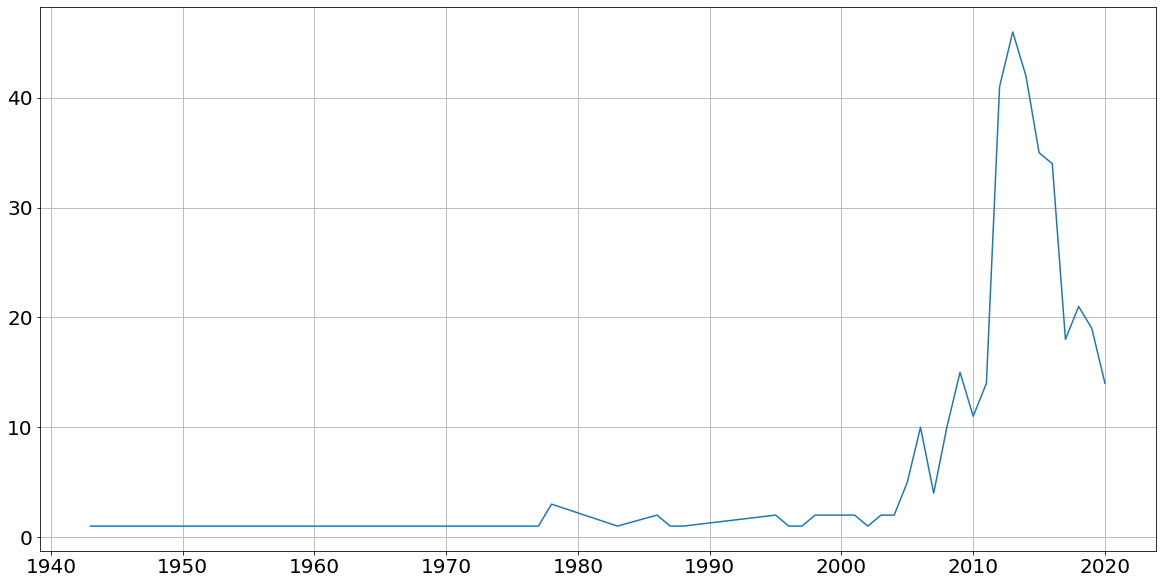

In [32]:
# your code here
# you might want to bucket the sightings into years
# or perhaps you have some other ideas. we are flexible.
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.copy.html
cleaned_dataframe_years = cleaned_dataframe_duration.copy()
cleaned_years_str = ""
for row in cleaned_dataframe_years.index:
    cleaned_years_str = str(cleaned_dataframe_years.loc[row, "Date / Time"])
    if(cleaned_years_str != 'nan'):
        pos_second_slash = cleaned_years_str.find("/", 3)
        # print(cleaned_years_str, cleaned_years_str[pos_second_slash+1:pos_second_slash+3])
        years = cleaned_years_str[pos_second_slash+1:pos_second_slash+3]
        
        if(int(years) <= 20):
            years = "20" + years
        else:
            years = "19" + years
        cleaned_dataframe_years.loc[row, 'Date / Time'] = int(years)

    else:
        # delete row
        cleaned_dataframe_years.drop(row, inplace=True)
#convert the entire column to ints to represent year
cleaned_dataframe_years = cleaned_dataframe_years.astype({"Date / Time": int})
#change the size of figure
plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size': 20})
frq_plot_years = cleaned_dataframe_years['Date / Time'].value_counts(sort = False).plot(kind = 'line', x = "Year", y = "Frequency", grid = True)
cleaned_dataframe_years

        

Based on your observations and analyses, what are some important next steps we should take?

After observing the graph, the most frequent observed shape for UFO in Alaska is Light, followed by Circle. UFO shapes have different durations after observing the box graph. For the final observation, there are more UFO sightings in the last decade than all the previous decades. However, this observation can be misleading since all records are from a website, and the internet was almost never used before the 2000's compared to today's society where the internet is almost universal. 

Some important next steps we should take would be to clean more data so the dataset will be more valid. Another step we should take with this data would be to analyze the data based on cities where UFOs are spotted. By doing this, we can determine where UFOs are likely to appear based on the city column of the dataset. 

## (10 points) BONUS

Finally, we'll set aside a few bonus points for any **amazing** or **inspiring** analysis you would like to do over our UFO data in addition to what we have covered so far. This bonus is designed to be a very heavy workload for very light reward. So focus on finishing the first three parts above before even considering this part. We will be extremely tough on grading this part ... so slapping together a quick figure will most likely result in 0 bonus. Good luck!

In [12]:
## your code here